In [68]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [114]:
class Perceptron():
    # Construtor
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.W = None
        self.b = None
    
    def activation_func(self, net_input):
        return np.where(net_input>0, 1, 0)
    
    def fit(self, X_train, y):
        n_ex, n_features = X_train.shape
        # inicializando pesos e vies
        self.W = np.random.uniform(size=n_features, low=-0.5, high=0.5)
        self.b = np.random.uniform(low=-0.5, high=0.5)
        
        for _ in range(self.n_iter):
            for ex_index, ex_features in enumerate(X_train):
                net_input = np.dot(ex_features, self.W) + self.b
                y_predicted = self.activation_func(net_input)
                self._update_weights(ex_features, y[ex_index], y_predicted)

    def _update_weights(self, ex_features, y_actual, y_predicted):
        error = y_actual - y_predicted
        weights_correction = self.learning_rate * error
        self.W += weights_correction * ex_features
        self.b += weights_correction * error
    
    def predict(self, X_train):
        net_input = np.dot(X_train, self.W) + self.b
        y_predicted = self.activation_func(net_input)
        return y_predicted
    
    def get_weights(self):
        return self.W
    
    def get_bias(self):
        return self.b

In [94]:

iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df["species"] = iris.target_names[iris.target]

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [95]:
iris_df["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

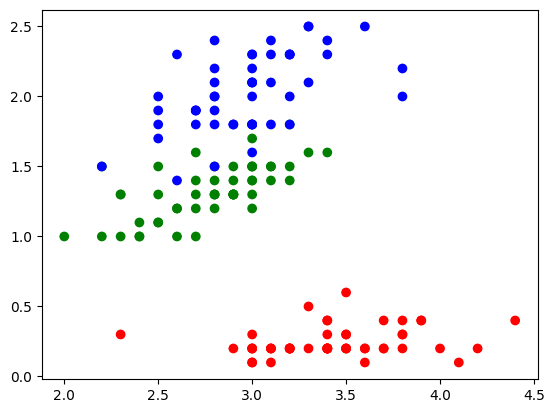

In [81]:
colors = iris_df["species"].replace(to_replace=['setosa', 'virginica', 'versicolor'], value=['red', 'blue', 'green'])
plt.scatter(iris_df['sepal width (cm)'], iris_df['petal width (cm)'], c = colors)

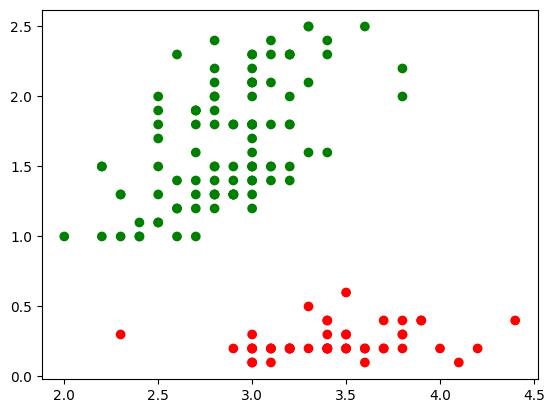

In [82]:
colors = iris_df["species"].replace(to_replace=['setosa', 'virginica', 'versicolor'], value=['red', 'green', 'green'])
plt.scatter(iris_df['sepal width (cm)'], iris_df['petal width (cm)'], c = colors)

In [96]:
df = iris_df.drop(['sepal length (cm)', 'petal length (cm)'], axis = 1)
df['species'].replace(to_replace=['setosa', 'virginica', 'versicolor'], value=[1.0, 0.0, 0.0], inplace=True)
df.head()

,sepal width (cm),petal width (cm),species
0,3.5,0.2,1.0
1,3.0,0.2,1.0
2,3.2,0.2,1.0
3,3.1,0.2,1.0
4,3.6,0.2,1.0


In [97]:
y = df[['species']]
y.head()

,species
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [98]:
X = df[['sepal width (cm)', 'petal width (cm)']]
X.head()

,sepal width (cm),petal width (cm)
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2
4,3.6,0.2


In [99]:
X1 = X.values
y1 = y.values.flatten()
y1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [127]:
perceptron = Perceptron()
perceptron.fit(X1, y1)

predictions = [perceptron.predict(x) for x in X1]

accuracy = np.mean(predictions == y1)*100

print(f'Acurácia: {accuracy:.3f}')

Acurácia: 100.000


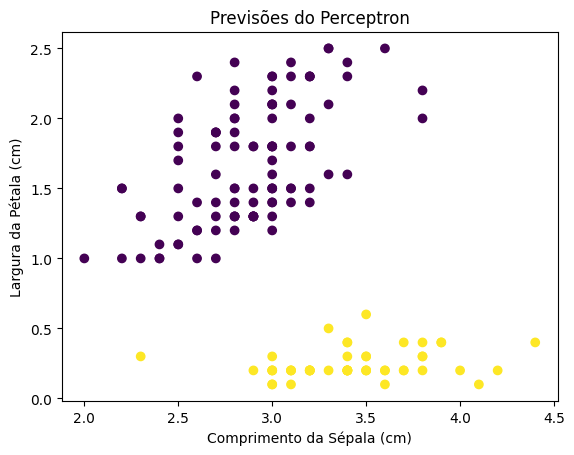

In [128]:
plt.scatter(X1[:, 0], X1[:, 1], c=predictions, cmap='viridis')
plt.xlabel('Comprimento da Sépala (cm)')
plt.ylabel('Largura da Pétala (cm)')
plt.title('Previsões do Perceptron')
plt.show()

In [129]:
w1, w2 = perceptron.get_weights()
bias = perceptron.get_bias()

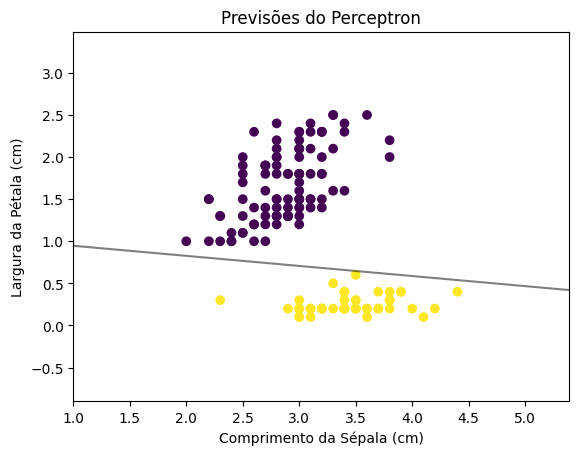

In [130]:
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], np.array([w1, w2])) + bias
Z = Z.reshape(xx.shape)

plt.scatter(X1[:, 0], X1[:, 1], c=predictions, cmap='viridis')
plt.xlabel('Comprimento da Sépala (cm)')
plt.ylabel('Largura da Pétala (cm)')
plt.title('Previsões do Perceptron')

# Plot do hiperplano de decisão
plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])
plt.show()